## colab에서 실행

## 데이터 https://goo.gl/s8qSL5

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
%matplotlib inline

## colab에서 실행하는 경우 필요한 코드

In [2]:
import os, os.path, shutil
if not os.path.exists("./data"):
    os.makedirs("./data")
#     https://www.dropbox.com/s/x7igxpgnq669l7y/bike_train.csv
!wget https://goo.gl/s8qSL5  -O ./data/bike_train.csv

--2019-03-08 00:47:26--  https://goo.gl/s8qSL5
Resolving goo.gl (goo.gl)... 74.125.203.113, 74.125.203.100, 74.125.203.138, ...
Connecting to goo.gl (goo.gl)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/x7igxpgnq669l7y/bike_train.csv [following]
--2019-03-08 00:47:27--  https://www.dropbox.com/s/x7igxpgnq669l7y/bike_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/x7igxpgnq669l7y/bike_train.csv [following]
--2019-03-08 00:47:28--  https://www.dropbox.com/s/raw/x7igxpgnq669l7y/bike_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0739e2d02915d0355af88a23a.dl.dropboxusercontent.com/cd/0/inline/Acp28EI1nSVd30psQ_aabDqfdQ5cZn5m0X

In [4]:
train = pd.read_csv("data/bike_train.csv", parse_dates=["datetime"])
#train = pd.read_csv("data/bike_train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


## datetime 데이터 분해

In [6]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

train[["datetime", "d-year", "d-month", "d-day", "d-hour", "d-minute", "d-second"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


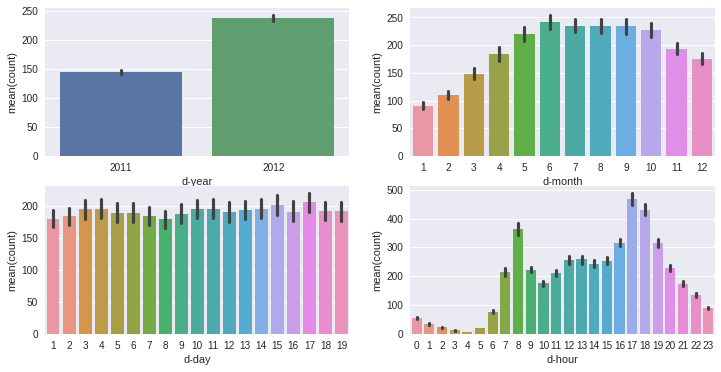

In [7]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

## 시간대별 평균 대여수 (주중, 주말 구분)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


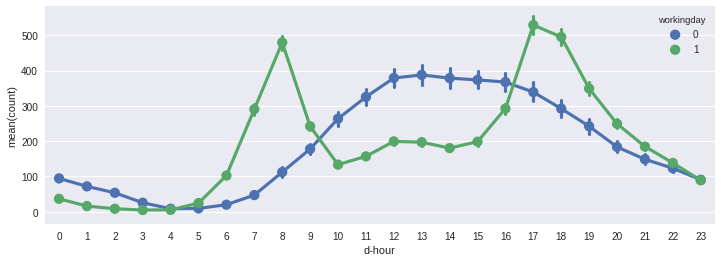

In [8]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

## 시간대별 대여수 - 요일 구분

In [9]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


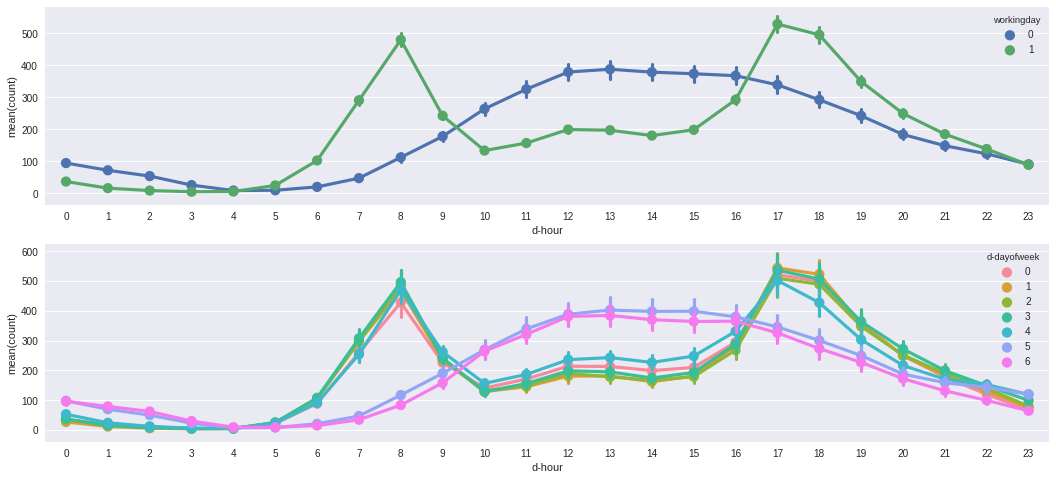

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

## 연도와 월을 합한 특성 변수 생성

In [11]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["d-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "d-year_month"]].head()

(10886, 20)


,datetime,d-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


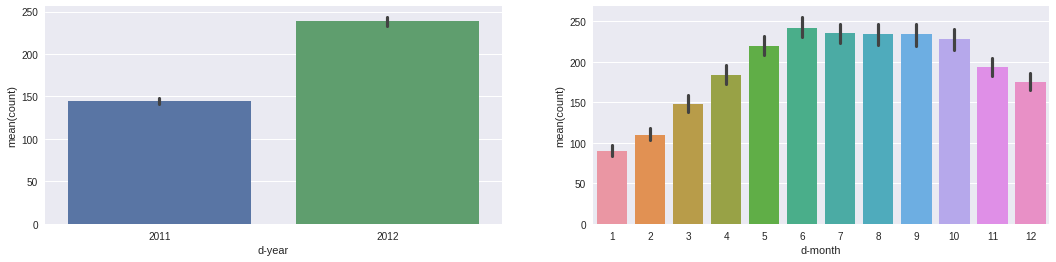

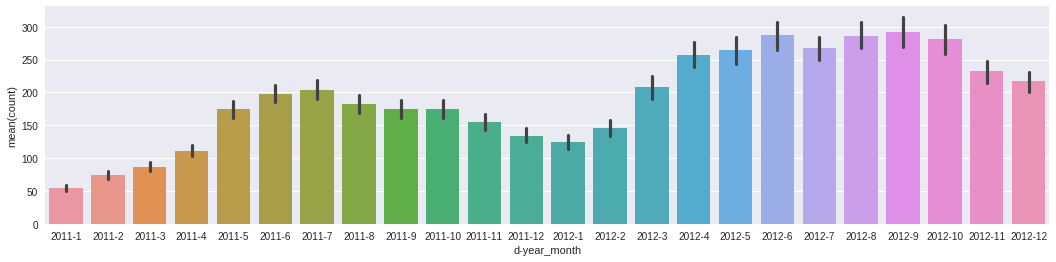

In [12]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year_month", y="count", ax=ax3)

## 훈련에 사용할 특성 선택

In [13]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-minute', 'd-second',
       'd-dayofweek', 'd-year_month'],
      dtype='object')

In [0]:
features = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "d-year", "d-hour", "d-dayofweek"] # 'casual', 'registered', 'count' 목적변수

In [15]:
X = train[features]
print(X.shape)
X.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [16]:
y = train["count"]
print(y.shape)

(10886,)


In [26]:
model = RandomForestRegressor(n_estimators= 300)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9490096177033809

In [36]:
import numpy as np
y_log = np.log(y + 1) # +1은 log(0) 무한대를 막기위해 오류차단

print(y_log.shape)
#y_log.head()
list(zip(y,y_log))[:10]

(10886,)


[(16, 2.833213344056216),
 (40, 3.713572066704308),
 (32, 3.4965075614664802),
 (13, 2.6390573296152584),
 (1, 0.6931471805599453),
 (1, 0.6931471805599453),
 (2, 1.0986122886681098),
 (3, 1.3862943611198906),
 (8, 2.1972245773362196),
 (14, 2.70805020110221)]

## 간단한 예측 모델

In [0]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2)

In [38]:
model = RandomForestRegressor(n_estimators= 30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9580883210969734

In [39]:
list(zip(y_test, model.predict(X_test)))[:10]

[(1.9459101490553132, 2.0403146519508772),
 (3.7612001156935624, 3.7669927593559467),
 (6.415096959171596, 6.302535786676932),
 (2.833213344056216, 2.824032746730312),
 (4.2626798770413155, 4.443539522423507),
 (2.70805020110221, 3.2117684044501233),
 (6.030685260261263, 5.914215047904423),
 (5.4510384535657, 5.41472429655433),
 (5.472270673671475, 5.697741213725065),
 (5.673323267171493, 5.595541299114385)]

In [40]:
X_train[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
7560,2,0,1,3,22.14,25.760,88,19.0012,2012,9,0
8090,2,0,0,1,25.42,31.060,57,7.0015,2012,11,6
30,1,0,0,2,16.40,20.455,76,12.9980,2011,7,6
7290,2,0,1,2,18.86,22.725,88,0.0000,2012,3,3
8665,3,0,1,2,32.80,37.120,52,12.9980,2012,10,4


## 선형회귀

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.37561934247883577

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9031443487303448

## 성능 지표( score) 함수 변경

In [41]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()    
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## 하이퍼파라미터 선택

### 그리드 탐색

In [49]:
n_estimators = 300

max_depth_list = [15, 20, 25]
max_features_list = [0.7, 0.8, 0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth, # 중요한 질문개수
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1) # 하이퍼파라미터 # n_jobs=-1 주어진 CPU를 다 활용

        score = cross_val_score(model, X_train, y_train, cv=5, #5번을 순차를 바꿔가면서 평균
                                scoring=rmsle_scorer).mean() #하이퍼파라미터 튜닝(train data), test data를 쓰면 안됨
# scoring=rmsle_scorer score가 작을수록 좋음
        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 0.32394
Score = 0.32073
Score = 0.31958
Score = 0.32081
Score = 0.31963
Score = 0.31867
Score = 0.32195
Score = 0.31930
Score = 0.31844


[{'max_depth': 15,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.3239385329421589},
 {'max_depth': 15,
  'max_features': 0.8,
  'n_estimators': 300,
  'score': 0.32073076389823063},
 {'max_depth': 15,
  'max_features': 0.9,
  'n_estimators': 300,
  'score': 0.31957846218824515},
 {'max_depth': 20,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.3208132407192429},
 {'max_depth': 20,
  'max_features': 0.8,
  'n_estimators': 300,
  'score': 0.319630271919978},
 {'max_depth': 20,
  'max_features': 0.9,
  'n_estimators': 300,
  'score': 0.31867083158384196},
 {'max_depth': 25,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.3219507733590163},
 {'max_depth': 25,
  'max_features': 0.8,
  'n_estimators': 300,
  'score': 0.31929960474441005},
 {'max_depth': 25,
  'max_features': 0.9,
  'n_estimators': 300,
  'score': 0.3184432640170755}]

In [50]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(9, 4)


,max_depth,max_features,n_estimators,score
8,25,0.9,300,0.318443
5,20,0.9,300,0.318671
7,25,0.8,300,0.319300
2,15,0.9,300,0.319578
4,20,0.8,300,0.319630


### 랜덤 탐색

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.34672
Score = 0.33773
Score = 0.37829
Score = 0.33773
Score = 0.37829
Score = 0.41470
Score = 0.41436
Score = 0.32621
Score = 0.32621
Score = 0.33063
(10, 4)


,max_depth,max_features,n_estimators,score
7,94,0.793496,30,0.326207
8,67,0.753001,30,0.326207
9,31,0.725240,30,0.330631
1,54,0.557620,30,0.337729
3,47,0.600954,30,0.337729


### 상세 탐색

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 10
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=10, high=70)
    max_features = np.random.uniform(low=0.4, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.36444
Score = 0.33882
Score = 0.34933
Score = 0.35628
Score = 0.35040
Score = 0.34485
Score = 0.36444
Score = 0.33882
Score = 0.35628
Score = 0.35040
(10, 4)


,max_depth,max_features,n_estimators,score
1,34,0.939039,10,0.338818
7,63,0.916317,10,0.338818
5,19,0.796031,10,0.344853
2,28,0.718385,10,0.349331
4,44,0.673892,10,0.350404


## 최종 모델 선택

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              max_depth=83,
                              max_features=0.851358,
                              random_state=37,
                              n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score (lmsle)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [0]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.31860


## 주요 특성 변수

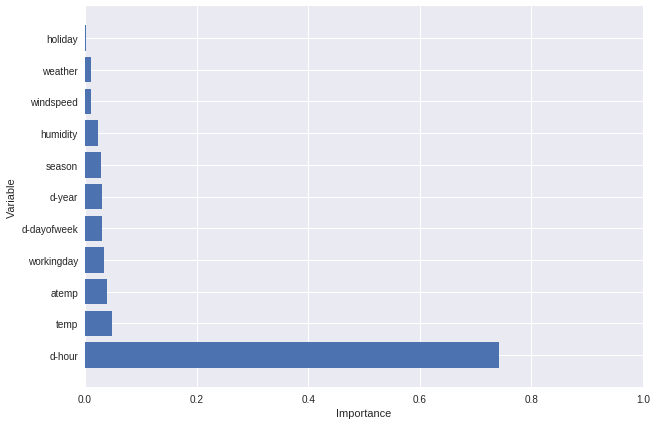

In [0]:
df = pd.DataFrame({'feature':features,'importance':model.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()